# Manutenção Preditiva

### Importanto bibliotecas para Pré-Análise e Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Carregando Arquivo

In [73]:
raw_data = pd.read_csv('./predictive_maintenance.csv')
df = raw_data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Obtendo informações básicas

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df['Target'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [6]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [15]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

### Alterando nomes das colunas

In [107]:
df = df.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]': 'Tool wear'}, axis=1)

# Análise de Dados

### Gráficos e Correlações

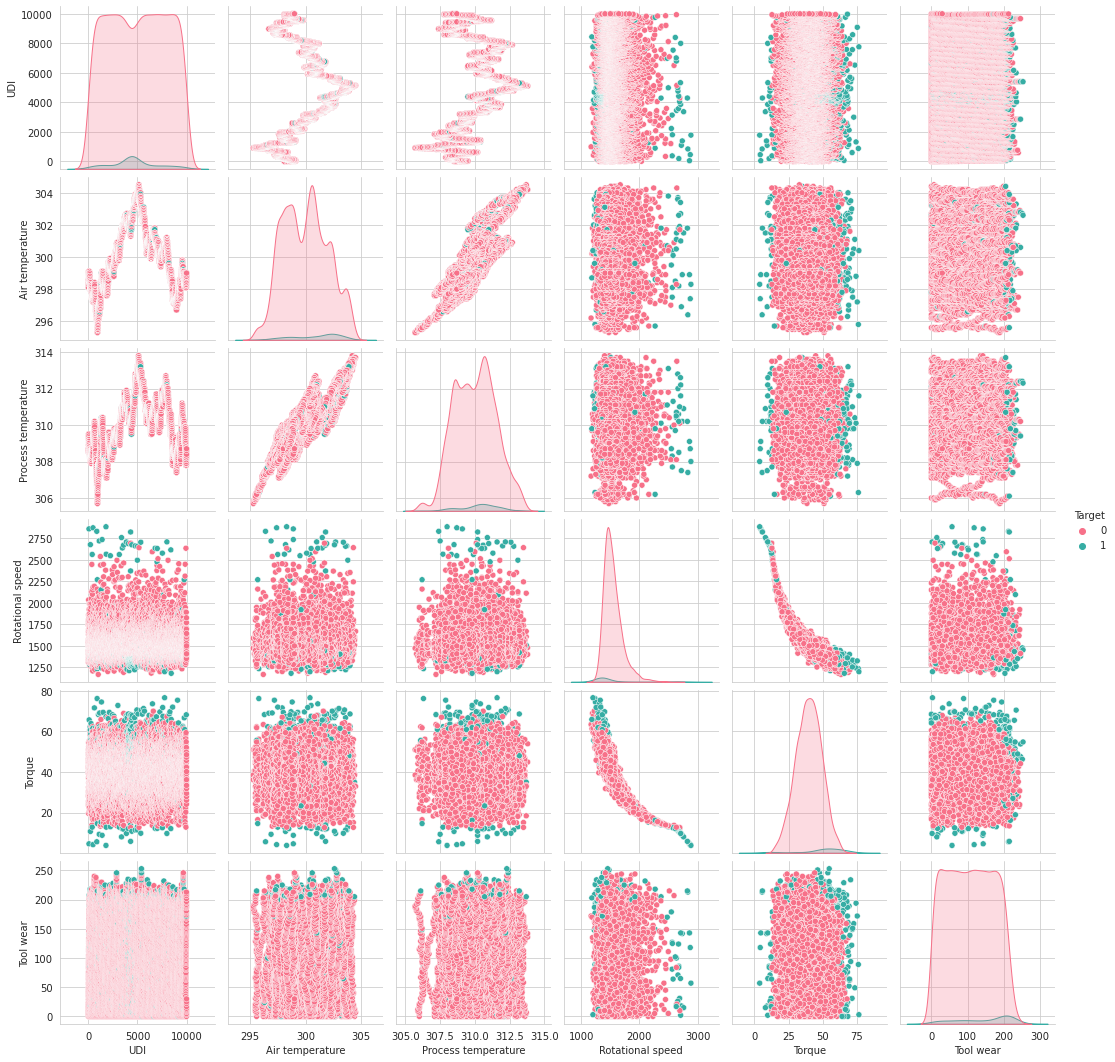

In [17]:
sns.pairplot(df, hue='Target', palette='husl')

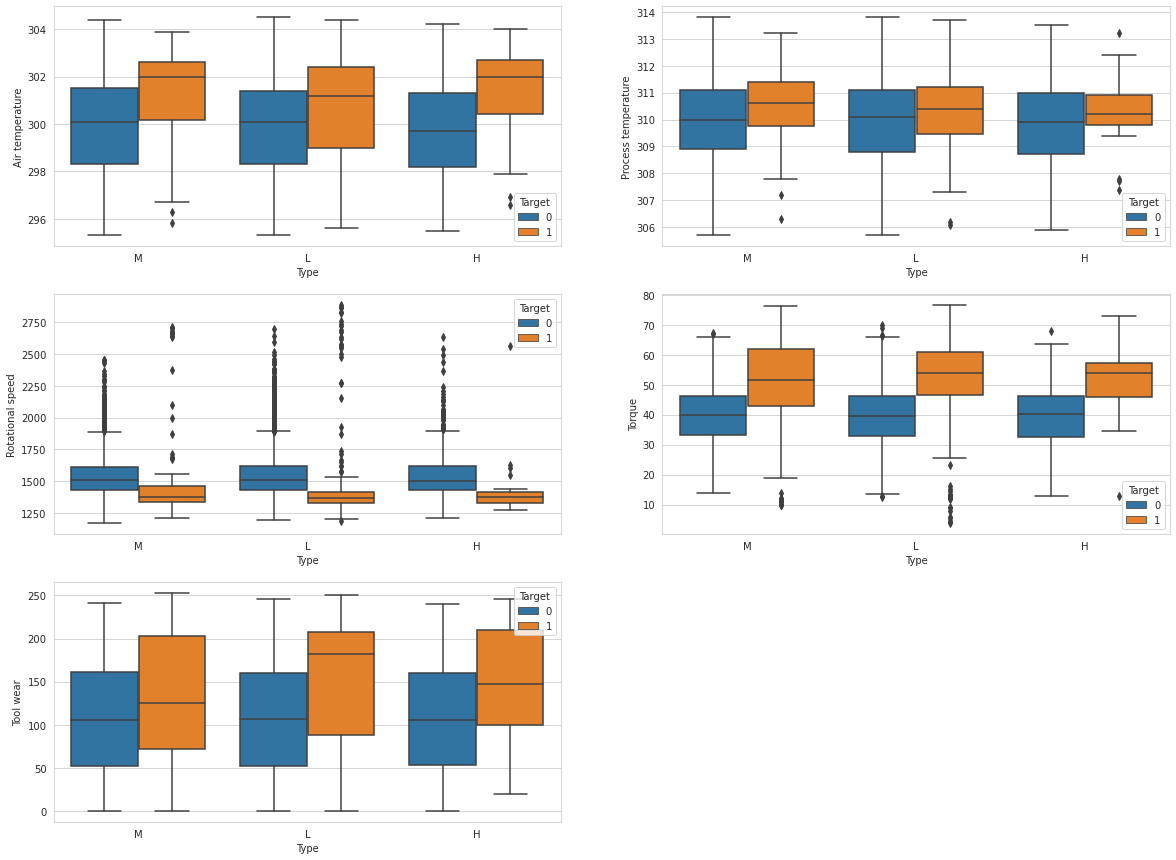

In [25]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature', 
          'Process temperature',
          'Rotational speed', 
          'Torque', 
          'Tool wear'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

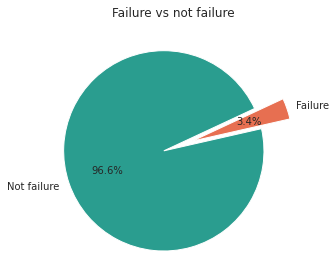

In [32]:
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%', startangle=25,
        colors=['#2a9d8f', '#e76f51'] )
plt.title('Failure vs not failure')
plt.tight_layout()
plt.show()

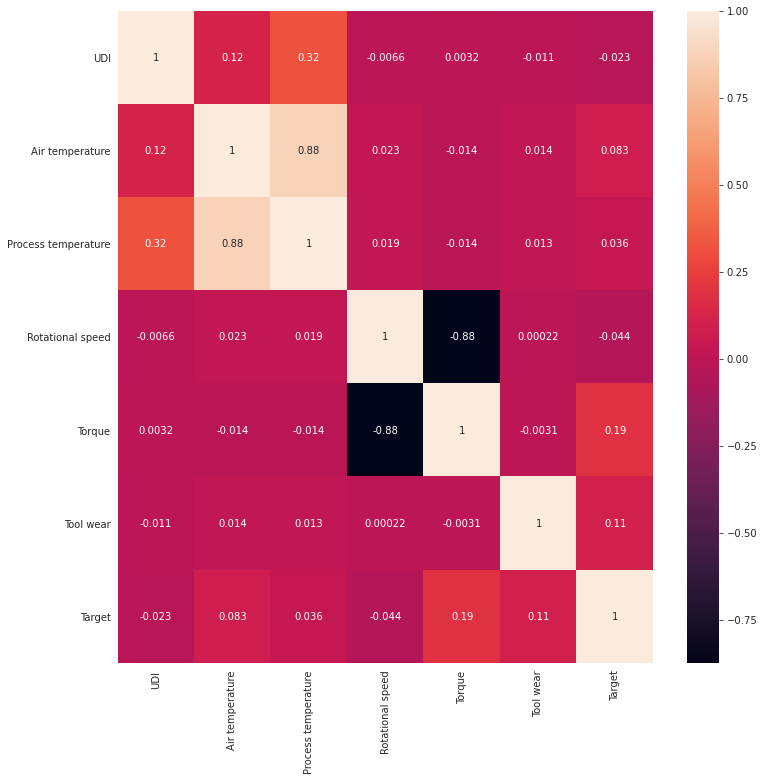

In [34]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Machine Learning

### Importanto Bibliotecas

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [74]:
df['Type'] = df['Type'].map({
    'L': 1,
    'M': 2,
    'H': 3
})

In [75]:
df = df.drop(['UDI', 'Product ID', 'Failure Type'], axis=1) 

In [76]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [77]:
x = df.drop('Target', axis=1)
y = df['Target']
x.shape, y.shape

((10000, 6), (10000,))

In [78]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573


In [79]:
x.columns = ['Type', 'Air Temperature', 'Process Temperature', 'Rotational Speed', 'Torque', 'Tool Wear']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 6), (2500, 6), (7500,), (2500,))

### Decision Tree

In [82]:
tree_params = {
    'max_depth': np.arange(1, 20)
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)
grid_search_tree.best_params_

{'max_depth': 10}

In [83]:
clf_tree = DecisionTreeClassifier(max_depth=10)

In [84]:
cross_val_tree = cross_val_score(clf_tree, x_test, y_test, cv=5)
print(f'Média: {(cross_val_tree * 100).mean()}')

Média: 96.8


In [103]:
clf_tree.fit(x_train, y_train)
predict_tree = clf_tree.predict(x_test)
acc_tree = clf_tree.score(x_test, y_test)
print(classification_report(y_test, predict_tree))
print(f'Decision Tree acc = {(acc_tree * 100):.2f}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2415
           1       0.79      0.75      0.77        85

    accuracy                           0.98      2500
   macro avg       0.89      0.87      0.88      2500
weighted avg       0.98      0.98      0.98      2500

Decision Tree acc = 98.48


### Confusion Matrix for Decision Tree

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [105]:
cm = confusion_matrix(y_test, predict_tree)
print(cm)
print('Acurácia: ', accuracy_score(y_test, predict_tree), str(accuracy_score(y_test, predict_tree)*100) + '%')

[[2398   17]
 [  21   64]]
Acurácia:  0.9848 98.48%


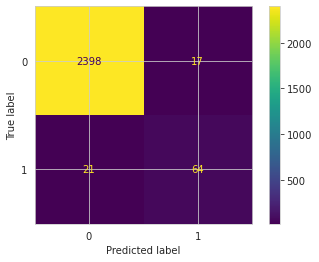

In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### SVM - Utilizando outro modelo (Sklearn) como parâmetro

In [90]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
randomized_search_svm = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=5, scoring='accuracy')
randomized_search_svm.fit(x_train, y_train)
randomized_search_svm.best_params_

{'kernel': 'sigmoid', 'gamma': 0.001, 'C': 1}

In [91]:
clf_svm = SVC(kernel='rbf', gamma='scale', C=10)

In [92]:
cross_val_svm = cross_val_score(clf_svm, x_test, y_test, cv=5)
print(f'Média: {(cross_val_svm * 100).mean()}')

Média: 97.51999999999998


In [94]:
clf_svm.fit(x_train, y_train)
predict_svm = clf_svm.predict(x_test)
acc_svm = clf_svm.score(x_test, y_test)
print(classification_report(y_test, predict_svm))
print(f'SVM = {(acc_svm * 100):.2f}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2415
           1       0.83      0.34      0.48        85

    accuracy                           0.98      2500
   macro avg       0.90      0.67      0.74      2500
weighted avg       0.97      0.98      0.97      2500

SVM = 97.52
